To measure the concept of readability, Flesch Index (FI) is calculated. We have learned that a high Flesch Index (~100) can be related with high readability and vice versa. To get to the Flesch Index, we need to have the number of words (numWords), number of sentences (numSentences) and number of Syllables (numSyllables) in our text and plug those values in the formula that computes FI. 

To get to the Flesch Index, I created a function that would take the name of the .txt file and return the calculated FI for us. I have given numbers in the different sections of function so that it would be easier to explain my thought process behind the code.

1. After the user passes the file name as an argument in the flesch() function, that name gets passed to the open function which opens the file in **"read mode"** as f. I then read the file from start to end and store the read text in a new variable called *f_contents*.
    
    Sentences are generally identified through the presence of certain punctuation that ends a sentence, which can be a *period(.)*, *question mark(?)* and *exclamation mark (!)*. It should also be noted that a space follows these punctuations when a new sentence begins. So I used these 3 punctuations followed by a space as a way to split sentences. I also used a combination of period(.) and a new line to identify a sentence as this would be the case when changing paragraphs.
    
    I used the **regular expression** package to split the sentences based on the above mentioned criterias and stored the list of sentences in a new variable called *sent_split*. I would take the length of this list as the number of sentences in the file. But before taking the length of the list, I had to remove any empty strings that might be in the list. There were cases in the text where there were three periods separated with spaces which would incorrectly treat the empty string ahead of the second period as a sentence. So I used a list comprehension to remove any empty string in the list and finally stored the length of the list as **numSentences**.


2. Now we need the number of words in the text. We know that the words in any text are separated with a space so we use this knowledge to split all the words in the text and store the resulting list in *word_split*. There is also a situation where words are separated with a new line, so I used space and new line as the splitting criteria in my program. 

    I could just take the length of this list and store it as the number of words in the text (numWords) but I decided to first remove any punctuation mark that would be in the words in the list. This is because, next I would want to find the number of syllables at which point having a punctuation mark at the end of the word would be a problem to implement the logic behind finding the number of syllables. To remove the punctuation from the words, I stored all sorts of punctuation marks that might appear in a text as a string in *punc* variable. I, then, went through each word in the list and then through each character in the word to see if there was any punctuation mark, and if there was, I replaced it with an empty string(""). 
    
    To be sure that I don't have any empty strings in the list, I then used a list comprehension that would check for empty strings and remove them. After this, I finally stored the number of words in a new variable called **numWords**.
    
    
3. By going through the list of words without punctuations or empty strings that I got earlier, I applied the given logic of identifing the syllables. I made a counter variable called numSyllables with a value of 0 inside the for loop so that the I could store the number of syllables of each word in a new list called *new*. Each time the program encountered a syllable in a word, it would increase the counter by 1 and store the total syllable in the word in a list before going to the start of the loop again for a new word with the counter again set to 0. After the loop goes through all the words, I would have a list of number of syllables for each word in the text. The **numSyllables** variable is then updated to the sum of the list, which represents the number of syllables in the text.

    First I created the counter variable outside the loop and used that variable as the total number of syllables in the text but I decided to create a list of number of syllables to later make a chart that would show the number of syllables in a word and how many times they appeared in the text. 
    
    
4. Now that we have all the required variables to use in the formula, next is to calculate the FI. I used the given formula to get the FI and stored it in a variable called *score*. I did not just want the function to return this score, but also some other values and list that we got in the function. This is why I decided to return a dictionary with all the values I might need in the future to visualize or tabulate the results. 
    
    So the function "flesch()" ultimately returns a dictionary with the number of sentences, number of syllables, number of words, the FI and the list that contains number of syllables in each word of the text.

In [6]:
import re

def flesch(file):
    # 1.
    with open(file, 'r', encoding='utf8') as f:
        f_contents = f.read()

    sent_split = re.split(r'\. |\? |! |\.\n', f_contents) # Splitting text into sentences
    sent_split = [i for i in sent_split if i]
    numSentences = len(sent_split)

    # 2.
    word_split = re.split(r' |\n', f_contents) # Splitting the text into words
    punc = '''’!()-—[]{};:'"\,<>./?@#$%^&*_~''' # Punctuations to filter out

    for i in range(len(word_split)):
        for j in word_split[i]:
            if j in punc:
                word_split[i] = word_split[i].replace(j, "") # Replacing punctuation with ""

    word_split = [i for i in word_split if i]
    numWords = len(word_split)

    # 3. 
    vowels = ["a", "e", "i", "o", "u"]
    new = []
    
    for word in word_split:
        numSyllables = 0
        word = word.lower()

        if word[0] in vowels: # If first letter is vowel numSyllables increases by 1
            numSyllables+=1

        if word == "the": # If the word is the, numSyllables increases by 1
            numSyllables += 1

        if word[-1] == "e": # If the last letter of the word is "e", remove that letter from the word
            word = word[0:-1]

        for i in range(1, len(word)): # Applying the two rules
            if word[i] in vowels and word[i-1] not in vowels:
                numSyllables+=1
        new.append(numSyllables)
        
    numSyllables = sum(new)
    
    # 4.
    score = 206.835 - 84.6 * (numSyllables / numWords) - 1.015 * (numWords/numSentences)
    results = {"sent" : numSentences, "sylla" : numSyllables, "words" : numWords, "flesch" : score, "sylList" : new}
    return sent_split

In [7]:
getty = flesch("The Gettysburg Address.txt")

In [8]:
getty

['The Gettysburg Address\nby Abraham Lincoln\n\nFour score and seven years ago, our fathers brought forth\nupon this continent a new nation:  conceived in liberty, and\ndedicated to the proposition that all men are created equal',
 '\nNow we are engaged in a great civil war',
 '.testing whether\nthat nation, or any nation so conceived and so dedicated',
 'can long endure',
 ' We are met on a great battlefield of that war',
 '\nWe have come to dedicate a portion of that field as a final resting place\nfor those who here gave their lives that this nation might live',
 'It is altogether fitting and proper that we should do this',
 '\nBut, in a larger sense, we cannot dedicate',
 '.we cannot consecrate',
 'we cannot hallow this ground',
 ' The brave men, living and dead,\nwho struggled here have consecrated it, far above our poor power\nto add or detract',
 ' The world will little note, nor long remember,\nwhat we say here, but it can never forget what they did here',
 '\nIt is for us the 

#### In the code chunk below I have called the flesch() function with all the text I want to work on.

In [16]:
ny = flesch("NY Times.txt")
getty = flesch("The Gettysburg Address.txt")
gatsby = flesch("The Great Gatsby.txt")
moby = flesch("Moby Dick.txt")
laugh = flesch("The Man Who Laughs.txt")
bio = flesch("Bioinformatics.txt")

In [17]:
print("The flesch score for the New York Times article is", ny["flesch"])
print("The flesch score for The Gettysburg Address is", getty["flesch"])
print("The flesch score for The Great Gatsby is", gatsby["flesch"])
print("The flesch score for Moby Dick is", moby["flesch"])
print("The flesch score for The Man Who Laughs is", laugh["flesch"])
print("The flesch score for Bioinformatics is", bio["flesch"])

The flesch score for the New York Times article is 61.91178719225644
The flesch score for The Gettysburg Address is 81.20334549878348
The flesch score for The Great Gatsby is 74.31233702661694
The flesch score for Moby Dick is 65.65596431040603
The flesch score for The Man Who Laughs is 74.92182177284634
The flesch score for Bioinformatics is 59.26890336128271


## Visualization
Now that I have all the values I need to visualize the information for all the texts, let's get to the visualization part of our analysis.

In [18]:
from collections import Counter
import matplotlib.pyplot as plt
def fig(syllist):
    count = Counter(syllist)
    keys = sorted(list(count.keys()))
    sortedcount = {i: count[i] for i in keys}

    fig = plt.bar(range(len(count)), list(sortedcount.values()), tick_label=list(sortedcount.keys()))
    plt.xlabel('Number of Syllables')
    plt.ylabel('Number of Words')
    return(plt.show())

The code above creates a function called *fig()* which returns a barchart with the number of syllables on the x-axis and the number of words that has that many syllables on the y-axis. 

This function makes use of the list of number of syllables that we returned as part of our dictionary from the flesch() function. First the function creates a dictionary with the number of syllables as the key and the total words with the given number of syllables as the vlaues. The keys are not in a sorted order which makes the ticks in the x-axis not so good. So I sort the dictionary based on the keys and create the plot with the sorted dictionary. 

I made use of the **matplotlib** package to do the visualization and used barchart here. 

#### Calling the fig() function individually with all the text we want to look at.

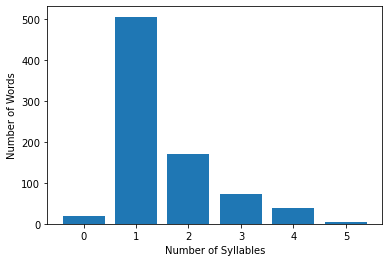

In [19]:
fig(ny["sylList"])

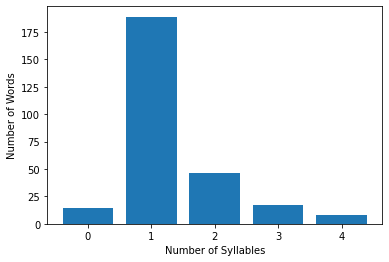

In [20]:
fig(getty["sylList"])

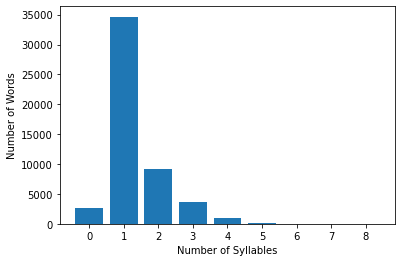

In [21]:
fig(gatsby["sylList"])

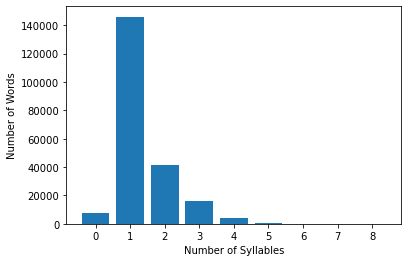

In [22]:
fig(moby["sylList"])

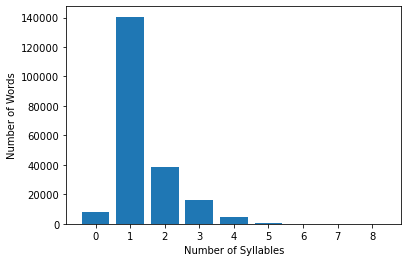

In [23]:
fig(laugh["sylList"])

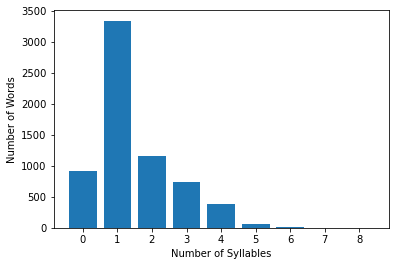

In [24]:
fig(bio["sylList"])

Looking at each of these plots, we can tell that most of the text has one syllable words more than any others. In some older texts like Moby Dick and The Man Who Laughs, we are able to see a small amount of words that has 6,7 or even 8 syllables in the text.

**Now** To compare how the Flesch Index of each text would look against each other we create another barchart, this time a horizontal barchart so that the names of the text would be easier to look at. 

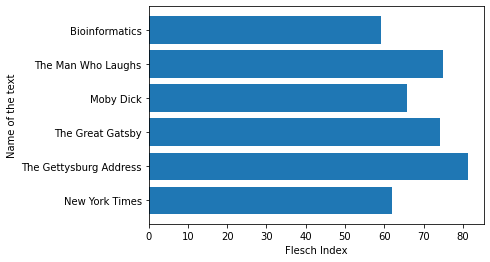

In [25]:
f_score = {"New York Times" : ny["flesch"], "The Gettysburg Address" : getty["flesch"], 
           "The Great Gatsby" : gatsby["flesch"], "Moby Dick" : moby["flesch"],
          "The Man Who Laughs" : laugh["flesch"], "Bioinformatics": bio["flesch"]}
plt.barh(range(len(f_score)), list(f_score.values()), tick_label=list(f_score.keys()))
plt.xlabel('Flesch Index')
plt.ylabel('Name of the text')
plt.show()

This barchart shows how each texts look against each other in terms of readability. The higher the FI, the better is the readability. We can see that the readability is highest for a speech. This is because speeches need to be simpler enough so that people can understand what the speaker wants them to understand as the speaker is speaking. People do not have much time to process what the speaker is saying. The lowest score is for the text I extracted from my Bioinformatics book. This is a book for college level people with a lot of technical information. This makes it not so readable as others.